In [284]:
# Python Project Template

# 1. Prepare Problem 

# a) Load libraries 
# b) Load dataset

# 2. Summarize Data 

# a) Descriptive statistics 
# b) Data visualizations

# 3. Prepare Data

# a) Data Cleaning 
# b) Feature Selection 
# c) Data Transforms

# 4. Evaluate Algorithms 

# a) Split-out validation dataset 
# b) Test options and evaluation metric 
# c) Spot Check Algorithms 
# d) Compare Algorithms

# 5. Improve Accuracy

# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model 

# a) Predictions on validation dataset 
# b) Create standalone model on entire training dataset 
# c) Save model for later use


# 1. Prepare Problem 

In [285]:
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [286]:
# Load dataset

df =pd.read_csv("Desktop\\sonar.csv", header=None)


# 2. Summarize Data 

In [287]:
set_option('display.width', 100)
df.head(10)

0      1      2      3      4      5      6      7      8      9  ...     51     52     53  \
0  0.020  0.037  0.043  0.021  0.095  0.099  0.154  0.160  0.311  0.211 ...  0.003  0.006  0.016   
1  0.045  0.052  0.084  0.069  0.118  0.258  0.216  0.348  0.334  0.287 ...  0.008  0.009  0.005   
2  0.026  0.058  0.110  0.108  0.097  0.228  0.243  0.377  0.560  0.619 ...  0.023  0.017  0.009   
3  0.010  0.017  0.062  0.021  0.021  0.037  0.110  0.128  0.060  0.126 ...  0.012  0.004  0.015   
4  0.076  0.067  0.048  0.039  0.059  0.065  0.121  0.247  0.356  0.446 ...  0.003  0.005  0.011   
5  0.029  0.045  0.028  0.017  0.038  0.099  0.120  0.183  0.210  0.304 ...  0.004  0.001  0.004   
6  0.032  0.096  0.132  0.141  0.167  0.171  0.073  0.140  0.208  0.351 ...  0.020  0.025  0.013   
7  0.052  0.055  0.084  0.032  0.116  0.092  0.103  0.061  0.146  0.284 ...  0.008  0.012  0.004   
8  0.022  0.037  0.048  0.048  0.065  0.059  0.075  0.010  0.068  0.149 ...  0.015  0.013  0.015   
9  0.016  0.017  0.035  0.007  0.019  0.067  0.106  0.070  0.096  0.025 ...  0.009  0.022  0.018   

      54     55     56     57     58     59  60  
0  0.007  0.017  0.018  0.008  0.009  0.003   R  
1  0.009  0.019  0.014  0.005  0.005  0.004   R  
2  0.018  0.024  0.032  0.016  0.009  0.008   R  
3  0.009  0.007  0.005  0.004  0.004  0.012   R  
4  0.011  0.002  0.007  0.005  0.011  0.009   R  
5  0.001  0.009  0.006  0.003  0.005  0.006   R  
6  0.007  0.014  0.009  0.014  0.004  0.010   R  
7  0.012  0.010  0.009  0.005  0.005  0.005   R  
8  0.006  0.005  0.006  0.009  0.006  0.002   R  
9  0.008  0.007  0.003  0.004  0.006  0.004   R  

[10 rows x 61 columns]

In [288]:
df.shape

(208, 61)

In [289]:
set_option('display.max_row',500)
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object

In [290]:
set_option('precision',3)
df.describe()

0          1        2        3        4        5        6        7        8        9   \
count  208.000  2.080e+02  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000   
mean     0.029  3.844e-02    0.044    0.054    0.075    0.105    0.122    0.135    0.178    0.208   
std      0.023  3.296e-02    0.038    0.047    0.056    0.059    0.062    0.085    0.118    0.134   
min      0.002  6.000e-04    0.002    0.006    0.007    0.010    0.003    0.005    0.007    0.011   
25%      0.013  1.645e-02    0.019    0.024    0.038    0.067    0.081    0.080    0.097    0.111   
50%      0.023  3.080e-02    0.034    0.044    0.062    0.092    0.107    0.112    0.152    0.182   
75%      0.036  4.795e-02    0.058    0.065    0.100    0.134    0.154    0.170    0.233    0.269   
max      0.137  2.339e-01    0.306    0.426    0.401    0.382    0.373    0.459    0.683    0.711   

         ...           50         51         52       53         54         55         56  \
count    ...      208.000  2.080e+02  2.080e+02  208.000  2.080e+02  2.080e+02  2.080e+02   
mean     ...        0.016  1.342e-02  1.071e-02    0.011  9.290e-03  8.222e-03  7.820e-03   
std      ...        0.012  9.634e-03  7.060e-03    0.007  7.088e-03  5.736e-03  5.785e-03   
min      ...        0.000  8.000e-04  5.000e-04    0.001  6.000e-04  4.000e-04  3.000e-04   
25%      ...        0.008  7.275e-03  5.075e-03    0.005  4.150e-03  4.400e-03  3.700e-03   
50%      ...        0.014  1.140e-02  9.550e-03    0.009  7.500e-03  6.850e-03  5.950e-03   
75%      ...        0.021  1.673e-02  1.490e-02    0.015  1.210e-02  1.058e-02  1.043e-02   
max      ...        0.100  7.090e-02  3.900e-02    0.035  4.470e-02  3.940e-02  3.550e-02   

              57         58         59  
count  2.080e+02  2.080e+02  2.080e+02  
mean   7.949e-03  7.941e-03  6.507e-03  
std    6.470e-03  6.181e-03  5.031e-03  
min    3.000e-04  1.000e-04  6.000e-04  
25%    3.600e-03  3.675e-03  3.100e-03  
50%    5.800e-03  6.400e-03  5.300e-03  
75%    1.035e-02  1.033e-02  8.525e-03  
max    4.400e-02  3.640e-02  4.390e-02  

[8 rows x 60 columns]

In [291]:
df.groupby(60).size()

60
M    111
R     97
dtype: int64

In [292]:
df.skew()

0     2.131
1     2.156
2     2.653
3     3.402
4     2.018
5     1.248
6     0.971
7     1.481
8     1.634
9     1.281
10    0.988
11    0.589
12    0.737
13    1.022
14    0.764
15    0.695
16    0.654
17    0.526
18    0.283
19   -0.085
20   -0.253
21   -0.392
22   -0.594
23   -0.692
24   -0.789
25   -0.672
26   -0.628
27   -0.615
28   -0.442
29   -0.132
30    0.260
31    0.313
32    0.424
33    0.563
34    0.592
35    0.620
36    0.677
37    1.033
38    0.909
39    0.861
40    0.864
41    0.860
42    0.909
43    1.235
44    1.367
45    1.707
46    1.790
47    1.278
48    1.273
49    1.762
50    2.716
51    2.094
52    1.061
53    1.093
54    1.790
55    1.781
56    1.653
57    2.098
58    1.738
59    2.776
dtype: float64

### Unimodal Data Visualizations

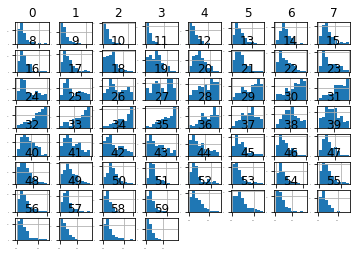

In [293]:
df.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1)
plt.show()

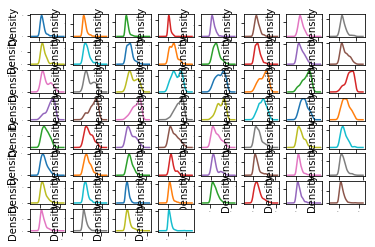

In [294]:
df.plot(kind='density',subplots=True,layout=(8,8),sharex=False,legend=False,fontsize=1)
plt.show()

This is useful, you can see that many of the attributes have a skewed distribution. A power transform like a Box-Cox transform that can correct for the skew in distributions might be useful.It is always good to look at box and whisker plots of numeric attributes to get an idea of the spread of values.

### Multimodal Data Visualizations

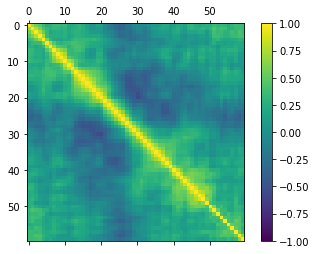

In [295]:
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(df.corr(),vmax=1,vmin=-1,interpolation='none')
fig.colorbar(cax)
plt.show()


It looks like there is also some structure in the order of the attributes. The yello around the diagonal suggests that attributes that are next to each other are generally more correlated with each other. The blue patches also suggest some moderate negative correlation the further attributes are away from each other in the ordering. This makes sense if the order of the attributes refers to the angle of sensors for the sonar chirp.

# Validation Dataset

In [296]:
# Split-out validation dataset 

array = df.values
X = array[:,0:60].astype(float) 
Y = array[:,60] 
validation_size = 0.20 
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


## Evaluate Algorithms: Baseline

In [297]:
# Test options and evaluation metric

num_folds = 10 
seed = 7 
scoring = 'accuracy'

We don’t know what algorithms will do well on this dataset. Gut feel suggests distance based algorithms like k-Nearest Neighbors and Support Vector Machines may do well. Let’s design our test harness. We will use 10-fold cross validation. The dataset is not too small and this is a good standard test harness conﬁguration. We will evaluate algorithms using the accuracy metric. This is a gross metric that will give a quick idea of how correct a given model is. More useful on binary classiﬁcation problems like this one.

In [298]:
# Spot-Check Algorithms 
models = [] 
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))



The algorithms all use default tuning parameters. Let’s compare the algorithms. We will display the mean and standard deviation of accuracy for each algorithm as we calculate it and collect the results for use later.

In [299]:
results = [] 
names = [] 
for name, model in models: 
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg=(name, cv_results.mean(), cv_results.std())
    print(msg)

('LR', 0.7827205882352941, 0.09379612475487001)
('LDA', 0.7463235294117647, 0.11785367885381073)
('KNN', 0.8080882352941176, 0.06750704820308338)
('CART', 0.6988970588235295, 0.08163834528219703)
('NB', 0.6488970588235294, 0.1418684214516758)
('SVM', 0.6088235294117647, 0.1186560591820866)


 The results suggest That both Logistic Regression and k-Nearest Neighbors may be worth further study

These are just mean accuracy values. It is always wise to look at the distribution of accuracy values calculated across cross validation folds. We can do that graphically using box and whisker plots.


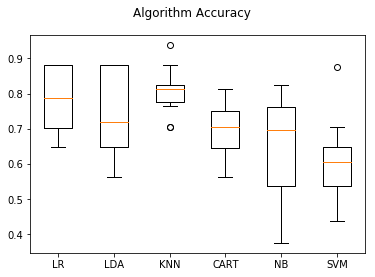

In [300]:
# Compare Algorithms

fig=plt.figure()
fig.suptitle('Algorithm Accuracy')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results show a tight distribution for KNN which is encouraging, suggesting low variance. The poor results for SVM are surprising.It is possible that the varied distribution of the attributes is having an eﬀect on the accuracy of algorithms such as SVM. In the next section we will repeat this spot-check with a standardized copy of the training dataset.


## Evaluate Algorithms: Standardize Data

We suspect that the diﬀering distributions of the raw data may be negatively impacting the skill of some of the algorithms. Let’s evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of one. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.


In [301]:
# Standardize the dataset

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())]))) 
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())]))) 
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = [] 
names = [] 
for name, model in pipelines: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name)
    msg =(name, cv_results.mean(), cv_results.std())
    print(msg)
    




('ScaledLR', 0.7341911764705882, 0.09588542601535087)
('ScaledLDA', 0.7463235294117647, 0.11785367885381073)
('ScaledKNN', 0.8257352941176471, 0.054511038214266574)
('ScaledCART', 0.7235294117647059, 0.12146604819887695)
('ScaledNB', 0.6488970588235294, 0.1418684214516758)
('ScaledSVM', 0.8363970588235293, 0.08869747214968386)


We can see that KNN is still doing well, even better than before. We can also see that the standardization of the data has lifted the skill of SVM to be the most accurate algorithm tested so far.


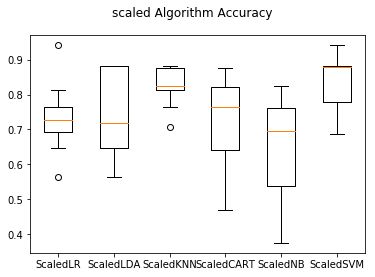

In [302]:
# Compare Algorithms

fig=plt.figure()
fig.suptitle('scaled Algorithm Accuracy')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results suggest digging deeper into the SVM and KNN algorithms. It is very likely that conﬁguration beyond the default may yield even more accurate models.

## Algorithm Tuning

In this section we investigate tuning the parameters for two algorithms that show promise from the spot-checking in the previous section: KNN and SVM.


### Tuning KNN

We can start oﬀ by tuning the number of neighbors for KNN. The default number of neighbors is 7. Below we try all odd values of k from 1 to 21, covering the default value of 7. Each k value is evaluated using 10-fold cross validation on the training standardized dataset.

In [306]:
# Tune scaled KNN

scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
neighbors=[1,3,5,7,9,11,13,15,17,19,21]
param_grid=dict(n_neighbors=neighbors)
model=KNeighborsClassifier()
kfold=KFold(n_splits=num_fold,random_state=seed)
grid=GridSearchCV(model,param_grid=param_grid,cv=kfold,scoring=scoring)
grid_result=grid.fit(rescaledX,Y_train)
print(grid_result.best_score_,grid_result.best_params_)
print("\n")

mean=grid_result.cv_results_['mean_test_score']
std=grid_result.cv_results_['std_test_score']
param=grid_result.cv_results_['params']

for mean,std,param in zip(mean,std,param):
    print(mean,std,param)


0.8493975903614458 {'n_neighbors': 1}


0.8493975903614458 0.05988110090069771 {'n_neighbors': 1}
0.8373493975903614 0.06630330382796286 {'n_neighbors': 3}
0.8373493975903614 0.03749969758430342 {'n_neighbors': 5}
0.7650602409638554 0.08950992596280488 {'n_neighbors': 7}
0.7530120481927711 0.08697897949491253 {'n_neighbors': 9}
0.7349397590361446 0.10489007400824805 {'n_neighbors': 11}
0.7349397590361446 0.10583597849547675 {'n_neighbors': 13}
0.7289156626506024 0.07587309410809662 {'n_neighbors': 15}
0.7108433734939759 0.07871598186667497 {'n_neighbors': 17}
0.7228915662650602 0.08455537779041811 {'n_neighbors': 19}
0.7108433734939759 0.10882920638633953 {'n_neighbors': 21}


We can see that the optimal conﬁguration is K=1. This is interesting as the algorithm will make predictions using the most similar instance in the training dataset alone.


### Tuning SVM

We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the margin) and the type of kernel. The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid search using 10-fold cross validation with a standardized copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).

In [307]:
# Tune scaled SVM

scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
c_values=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values=['linear','poly','rbf','sigmoid']
param_grid=dict(C=c_values,kernel=kernel_values)
model=SVC()
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=kfold,scoring=scoring)
grid_result=grid.fit(rescaledX,Y_train)
print(grid_result.best_score_,grid_result.best_params_)
print("\n")

mean=grid_result.cv_results_['mean_test_score']
std=grid_result.cv_results_['std_test_score']
param=grid_result.cv_results_['params']

for mean,std,param in zip(mean,std,param):
    print(mean,std,param)


0.8674698795180723 {'C': 1.5, 'kernel': 'rbf'}


0.7590361445783133 0.09886327405671058 {'C': 0.1, 'kernel': 'linear'}
0.5301204819277109 0.11878006022028104 {'C': 0.1, 'kernel': 'poly'}
0.572289156626506 0.13033853327360725 {'C': 0.1, 'kernel': 'rbf'}
0.7048192771084337 0.0663596226254967 {'C': 0.1, 'kernel': 'sigmoid'}
0.7469879518072289 0.10891253844857184 {'C': 0.3, 'kernel': 'linear'}
0.6445783132530121 0.13229030877107076 {'C': 0.3, 'kernel': 'poly'}
0.7650602409638554 0.09231152338173192 {'C': 0.3, 'kernel': 'rbf'}
0.7349397590361446 0.05463116375770295 {'C': 0.3, 'kernel': 'sigmoid'}
0.7409638554216867 0.08303483150783184 {'C': 0.5, 'kernel': 'linear'}
0.6807228915662651 0.09863764643656386 {'C': 0.5, 'kernel': 'poly'}
0.7891566265060241 0.06431559978182318 {'C': 0.5, 'kernel': 'rbf'}
0.7469879518072289 0.059265219662503005 {'C': 0.5, 'kernel': 'sigmoid'}
0.7469879518072289 0.08452539277350771 {'C': 0.7, 'kernel': 'linear'}
0.7409638554216867 0.12796044734796017 {'C': 0.7, 'ker

We can see the most accurate conﬁguration was SVM with an RBF kernel and a C value of 1.5. The accuracy 86.7470% is seemingly better than what KNN could achieve.

## Ensemble Methods

Another way that we can improve the performance of algorithms on this problem is by using ensemble methods.We will use the same test harness as before, 10-fold cross validation. No data standardization is used in this case because all four ensemble algorithms are based on decision trees that are less sensitive to data distributions.

In [313]:
# ensembles

ensembles=[]

ensembles.append(('AB',AdaBoostClassifier()))
ensembles.append(('GBM',GradientBoostingClassifier()))
ensembles.append(('RFC',RandomForestClassifier()))
ensembles.append(('extraTree',ExtraTreesClassifier()))

results=[]
names=[]

for name,model in ensembles:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_result=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    msg=(name,cv_result.mean(),cv_result.std())
    print(msg)

('AB', 0.8139705882352942, 0.06601696463316956)
('GBM', 0.8419117647058822, 0.10312483616428214)
('RFC', 0.7216911764705882, 0.14041085675178977)
('extraTree', 0.8180147058823529, 0.07980990200769268)


We can see that both boosting techniques provide strong accuracy scores in the low 80s (%) with default conﬁgurations. We can plot the distribution of accuracy scores across the cross validation folds.


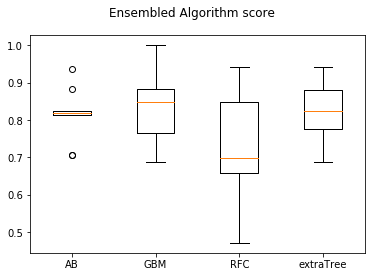

In [315]:
# Compare Algorithms

fig=plt.figure()
fig.suptitle('Ensembled Algorithm score')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results suggest GBM may be worthy of further study, with a strong mean and a spread that skews up towards high 90s (%) in accuracy.

# Finalize Model

The SVM showed the most promise as a low complexity and stable model for this problem. In this section we will ﬁnalize the model by training it on the entire training dataset and make predictions for the hold-out validation dataset to conﬁrm our ﬁndings. A part of the ﬁndings was that SVM performs better when the dataset is standardized so that all attributes have a mean value of zero and a standard deviation of one. We can calculate this from the entire training dataset and apply the same transform to the input attributes from the validation dataset.

In [319]:
# prepare the model

scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model=SVC(C=1.5)
model.fit(rescaledX,Y_train)

# estimate accuracy on validation dataset

rescaledvalidationX=scaler.transform(X_validation)
prediction=model.predict(rescaledvalidationX)
print(accuracy_score(Y_validation,prediction))
print('\n')
print(confusion_matrix(Y_validation,prediction))
print('\n')
print(classification_report(Y_validation,prediction))





0.8571428571428571


[[23  4]
 [ 2 13]]


             precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42

